In [78]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import FancyArrowPatch

def compute_average_S(K, n, b=3):
    exp = np.exp
    W3 = exp(2 * K + K / (2 ** n))  # +++ config
    W1a = exp(-K / (2 ** n))        # ++- or -++ configs
    W1b = exp(-2 * K + K / (2 ** n))  # +-+ config
    Z = W3 + 2 * W1a + W1b
    S_weighted = 3 * W3 + 1 * (2 * W1a + W1b)
    average_S = S_weighted / Z
    return average_S

def rg_step(K, n, b=3):
    avg_S = compute_average_S(K, n, b)
    K_next = K * (avg_S ** 2) / (b ** n)
    return K_next

def rg_flow(K_initial, n, num_steps=20, b=3):
    K_values = [K_initial]
    for _ in range(num_steps):
        avg_S = compute_average_S(K_values[-1], n, b)
        K_next = K_values[-1] * (avg_S ** 2) / (b ** n)
        K_values.append(K_next)
    return np.array(K_values)

def find_fixed_point(n, b=3, guess=1.0):
    # Solve for K where <S>(K,n)^2 == b**n (non-trivial fixed point)
    def equation(K):
        return compute_average_S(K, n, b)**2 - b**n
    
    # Check if possible: max <S>^2 =9, so if b**n >9, no solution
    if b**n > 9:
        return None
    K_c, = fsolve(equation, guess)
    if K_c > 0 and abs(equation(K_c)) < 1e-6:
        return K_c
    return None

def plot_rg_flow_curves(n, initial_Ks, num_steps=20, b=3):
    fig, ax = plt.subplots(figsize=(8, 6))
    steps = np.arange(num_steps + 1)
    
    # Sort initial_Ks for gradual coloring
    initial_Ks = np.sort(initial_Ks)
    
    # Normalize initial_Ks for colormap (0 to 1)
    norm = plt.Normalize(vmin=min(initial_Ks), vmax=max(initial_Ks))
    cmap = cm.get_cmap('Blues')  # Use 'Blues' for gradual shades in the same tone
    
    for i, K_init in enumerate(initial_Ks):
        flow = rg_flow(K_init, n, num_steps, b)
        color = cmap(norm(K_init))  # Assign color based on normalized K_init
        ax.plot(steps, flow, color='blue', label=f'K_init={K_init:.2f}')
    
    ax.set_xlabel('RG Steps')
    ax.set_ylabel('K')
    ax.set_title(f'RG Flow Curves for n={n}')
    #ax.legend()
    ax.grid(True)
    plt.ylim(0, max(5, max(initial_Ks)))
    plt.show()

In [84]:
K = 1
n = 2.5
rg_step(K, n, b=3)

np.float64(0.45223333573153385)

/var/folders/56/k5k1hn6s4pd9x__t6s6fpclr0000gn/T/ipykernel_11104/1355618515.py:81: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')  # Use 'Blues' for gradual shades in the same tone


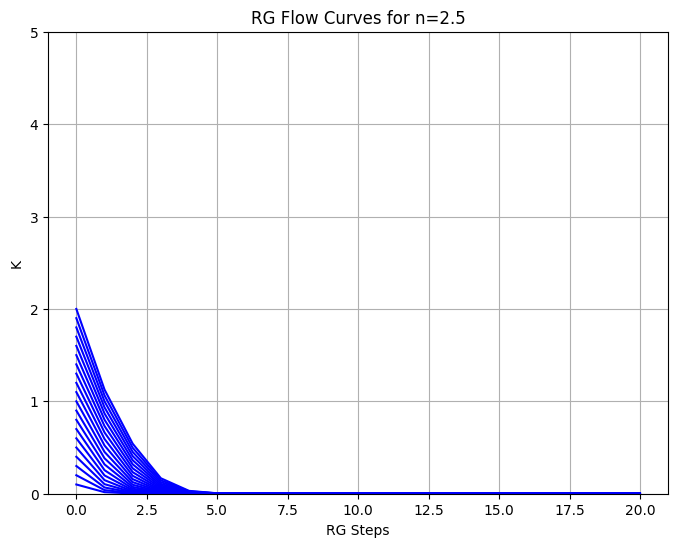

In [76]:
n = 2.5
initial_Ks = np.linspace(.1, 2, 20)
plot_rg_flow_curves(n, initial_Ks, num_steps=20, b=3)